# Vulnerability Evaluation with Unsupervised Learning


Unsupervised learning is a class of machine learning (ML) techniques used to find patterns in data. The data given to unsupervised algorithms is not labelled, which means only the input variables (X) are given with no corresponding output variables. In unsupervised learning, the algorithms are left to discover interesting structures in the data on their own.




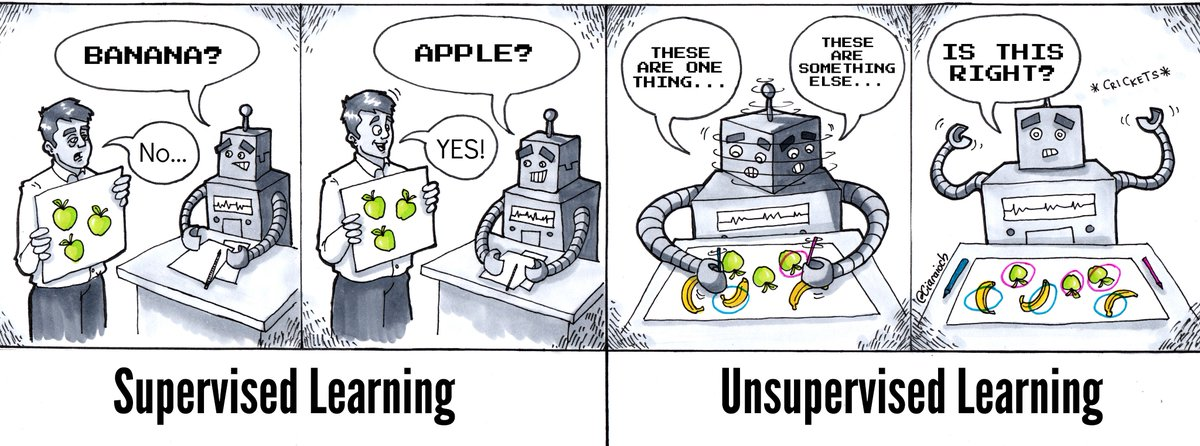

In [3]:
from sklearn.metrics import classification_report
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np

In [4]:
# Read it and drop the labels
cvss_data = pd.read_csv('2020cvss.csv')
cvss_data["label"] = (cvss_data["label"] >= 2).astype(int)
labels = cvss_data["label"]
cvss_data = cvss_data.drop("label", axis=1)
cvss_data = cvss_data.drop("Unnamed: 0", axis=1)

In [6]:
cvss_data.head()

attackVector  attackComplexity  privilegesRequired  userInteraction  \
0          0.55              0.44                0.62             0.85   
1          0.85              0.44                0.85             0.62   
2          0.55              0.77                0.62             0.62   
3          0.55              0.44                0.62             0.85   
4          0.55              0.44                0.27             0.85   

   confidentialityImpact  integrityImpact  availabilityImpact  
0                   0.66             0.66                0.66  
1                   0.66             0.66                0.66  
2                   0.66             0.66                0.66  
3                   0.00             0.00                0.66  
4                   0.66             0.66                0.66

# 1 - Train a k-means with 2 clusters for the CVSS dataset.



#### k-Means

Clustering algorithms aim at separating our data into clusters of similar entries. For instance, in our flower dataset, can we cluster the data into three different clusters so that flowers in the same family all fall into the same clusters? Yes, we can use the [k-Means](https://www.analyticsvidhya.com/blog/2016/11/an-introduction-to-clustering-and-different-methods-of-clustering/#:~:text=4.-,K%20Means%20Clustering,points%20in%202%2DD%20space.) algorithm for that.




The k-Means is an iterative clustering algorithm that aims to find the clusters that best aggregate our data in each iteration. The K-means defines clusters using a special point called a **centroid**, that defines what is the center of a cluster. As the name suggests, k-Means tries to find $k$ centroids, or means, and assigns entries to each cluster based on the closest centroid. The number of centroids $k$ is a input of the algorithm that we have to choose ourselves.

Let's see the k-means in practice with a simple example. Let's assume that we have the five data points below and that we want to cluster them. The k-Means finds the clusters following these 6 steps.


1- Define the number of clusters k, let's use $k = 2$

2- Randomly assign each data point to a cluster: Let’s assign three points in cluster 1 shown using red color and two points in cluster 2 shown using grey color.

3- Compute cluster centroids: The centroid of data points in the red cluster is shown using red cross and those in grey cluster using grey cross.

4- Re-assign each point to the closest cluster centroid : Note that only the data point at the bottom is assigned to the red cluster even though its closer to the centroid of grey cluster. Thus, we assign that data point into grey cluster

5- Re-compute cluster centroids.

6- Repeat steps 4 and 5 until no improvements are possible, that is, when there are no further switching of data points between two clusters.

In [7]:
# Declaring Model
model = KMeans(n_clusters=2, random_state=42)

# Fitting Model
model.fit(cvss_data)

KMeans(n_clusters=2, random_state=42)

In [9]:
# Predicitng a single input
fake_cvss = [[0.55,0.44,0.62,0.85,0.66,0.66,0.66]] 
predicted_label = model.predict(fake_cvss) 
print('Our fake cvss belongs to the cluster =', predicted_label[0])

Our fake cvss belongs to the cluster = 0


Which cluster do each of our cvss belong?

In [10]:
# Prediction on the entire data
all_predictions = model.predict(cvss_data)

# Printing Predictions
print(all_predictions)

[0 0 0 ... 0 1 0]


# 2 - Apply a PCA with 2 principal components in the features of the CVSS dataset.

In [34]:
# Plotting 1D
X = [cvss_data['attackVector']]
Y = cvss_data['attackComplexity']
target_names = ['attackVector', 'attackComplexity']

pca = PCA(n_components=1) #selecting number of dimensions
X_r = pca.fit(X).transform(X) 

In [ ]:
#Erro com veto

# 3 - Plot the results of the PCA with the color of each point representing the cluster that the k-means gave to it. 

In [33]:
for i, target_name in zip([0, 1], target_names):
    plt.scatter(X_r[all_predictions == i, 0], X_r[all_predictions == i, 1], alpha=.8, lw=2, edgecolor="k", s=50)
    plt.legend(target_names)

plt.xlabel("PC 1")
plt.ylabel("PC 2")
plt.title('PCA of the KMeans result')
plt.show()

IndexError: boolean index did not match indexed array along dimension 0; dimension is 1 but corresponding boolean dimension is 14315